In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set(color_codes=True)

dataset = pd.read_csv('absenteeism.csv')
dataset.shape

dataset.head(10)



,ID,Reason_for_absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service_time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


In [2]:
dataset.describe()

,ID,Reason_for_absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service_time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [3]:
dataset.dtypes

ID                                   int64
Reason_for_absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service_time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism                          int64
dtype: object

In [4]:
dataset.shape

(740, 21)

In [5]:
#Check for duplocate data
duplicate_rows = dataset[dataset.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (34, 21)


In [6]:
#CHECK FOR THE MISSING VALUES

print(dataset.isnull().sum())

ID                                 0
Reason_for_absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service_time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism                        0
dtype: int64


Text(0.5, 0, 'Absence')

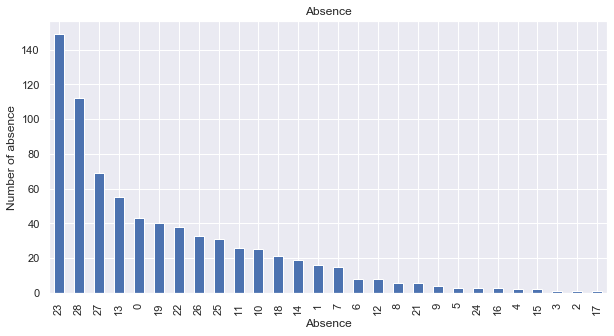

In [7]:
dataset.Reason_for_absence.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Absence")
plt.ylabel("Number of absence")
plt.xlabel("Absence")


In [8]:
#print summary statistics on attributes

print(dataset.describe())

ID  Reason_for_absence  Month of absence  Day of the week  \
count  740.000000          740.000000        740.000000       740.000000   
mean    18.017568           19.216216          6.324324         3.914865   
std     11.021247            8.433406          3.436287         1.421675   
min      1.000000            0.000000          0.000000         2.000000   
25%      9.000000           13.000000          3.000000         3.000000   
50%     18.000000           23.000000          6.000000         4.000000   
75%     28.000000           26.000000          9.000000         5.000000   
max     36.000000           28.000000         12.000000         6.000000   

          Seasons  Transportation expense  Distance from Residence to Work  \
count  740.000000              740.000000                       740.000000   
mean     2.544595              221.329730                        29.631081   
std      1.111831               66.952223                        14.836788   
min      1.000000 

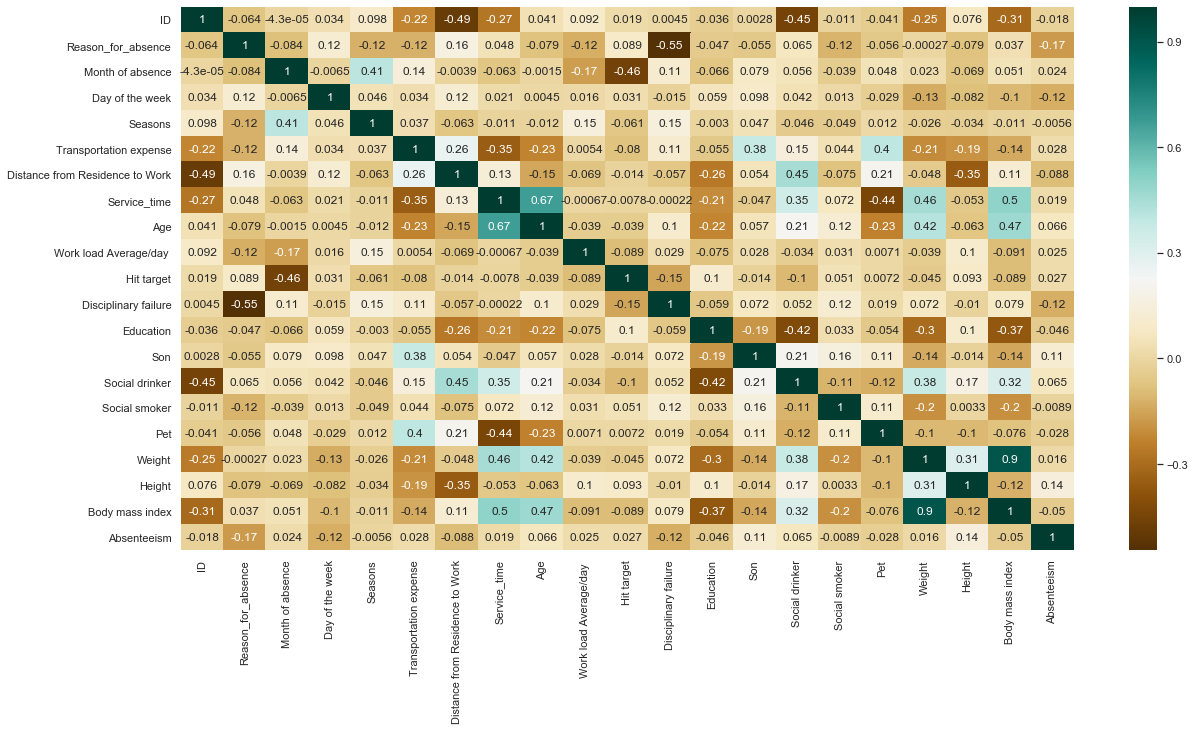

In [9]:
plt.figure(figsize=(20,10))
corl = dataset.corr()
sns.heatmap(corl, cmap="BrBG", annot=True)

In [10]:
dataset.shape

(740, 21)

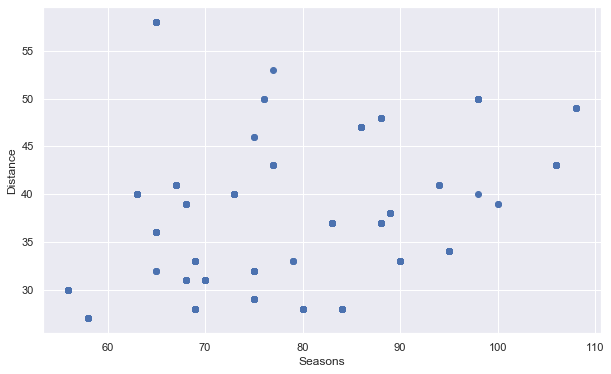

In [11]:
#Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(dataset['Weight'], dataset['Age'])
ax.set_xlabel('Seasons')
ax.set_ylabel('Distance')
plt.show()

In [12]:
X = dataset.drop(['Absenteeism'], axis=1)
X.head()

,ID,Reason_for_absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service_time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30


In [13]:
target = dataset.Absenteeism
print(target[0:5])

0    4
1    0
2    2
3    4
4    2
Name: Absenteeism, dtype: int64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.3, random_state=1)
print(X_train.shape)

(518, 20)


In [15]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


In [16]:
#Tune the model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.481981981981982


In [17]:
y_predict = clf.predict(X_test)
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Model Accuracy:  0.481981981981982
